Installations

In [ ]:
import sklearn
import statistics
from statistics import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset_toxicity_sd.csv')
df.shape, df.columns, df[:1],

((1460, 16),
 Index(['ID', 'smiles', 'toxic', 'FormalCharge', 'TPSA', 'MolWt', 'HeavyAtoms',
        'NHOH', 'HAcceptors', 'HDonors', 'Heteroatoms', 'AromaticRings',
        'SaturatedRings', 'AromaticOH', 'AromaticN', 'LogP'],
       dtype='object'),
          ID                                             smiles  toxic  \
 0  25239916  c1c2c(c(c(c1[131I])[O-])[131I])Oc3c(cc(c(c3[13...      0   
 
    FormalCharge   TPSA       MolWt  HeavyAtoms  NHOH  HAcceptors  HDonors  \
 0            -2  81.65  987.667498          33     0           5        0   
 
    Heteroatoms  AromaticRings  SaturatedRings  AromaticOH  AromaticN    LogP  
 0           13              3               0           0          0  7.4338  )

In [ ]:
#df[['toxic', 'MolWt', 'TPSA', 'LogP']].describe()

In [ ]:
#df.describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1460 non-null   int64  
 1   smiles          1460 non-null   object 
 2   toxic           1460 non-null   int64  
 3   FormalCharge    1460 non-null   int64  
 4   TPSA            1460 non-null   float64
 5   MolWt           1460 non-null   float64
 6   HeavyAtoms      1460 non-null   int64  
 7   NHOH            1460 non-null   int64  
 8   HAcceptors      1460 non-null   int64  
 9   HDonors         1460 non-null   int64  
 10  Heteroatoms     1460 non-null   int64  
 11  AromaticRings   1460 non-null   int64  
 12  SaturatedRings  1460 non-null   int64  
 13  AromaticOH      1460 non-null   int64  
 14  AromaticN       1460 non-null   int64  
 15  LogP            1460 non-null   float64
dtypes: float64(3), int64(12), object(1)
memory usage: 182.6+ KB


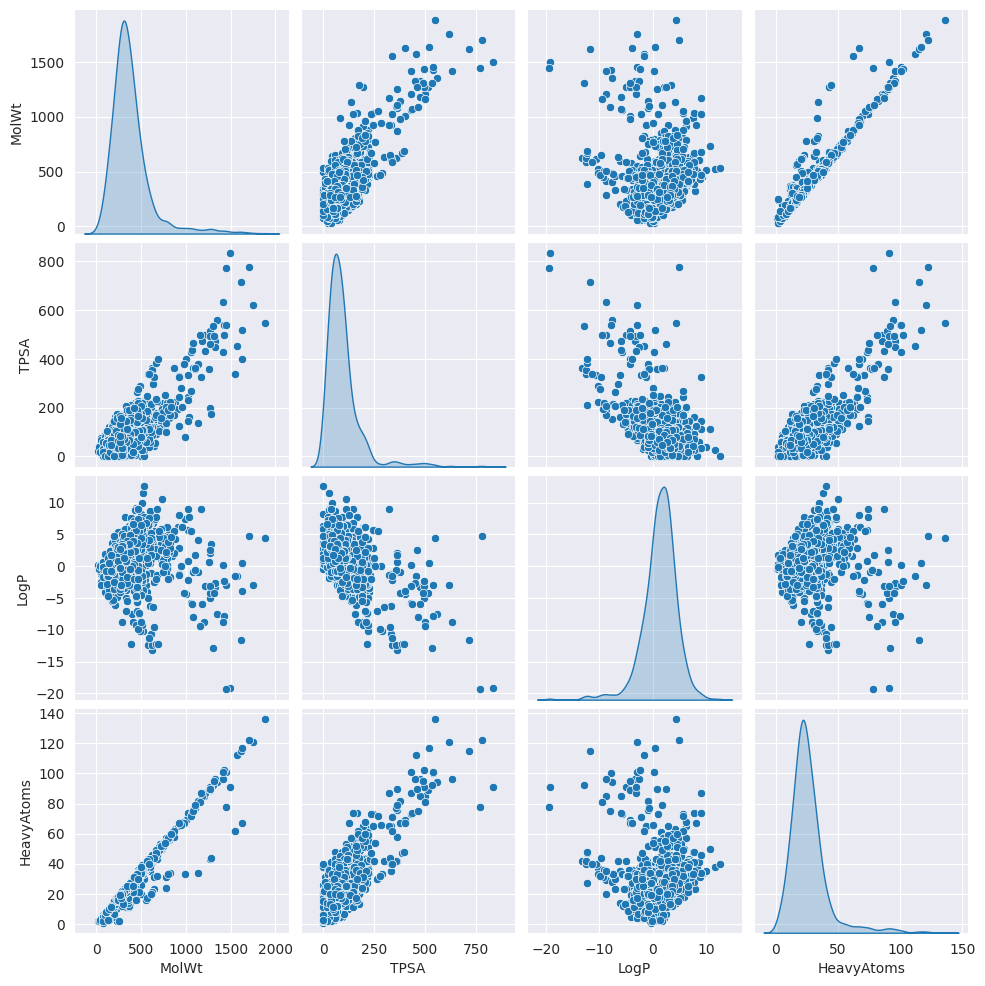

In [ ]:
feats = ['MolWt', 'TPSA', 'LogP', 'HeavyAtoms']
sns_plt = sns.pairplot(df[feats], diag_kind='kde', markers=['s', 'o'])

<Axes: xlabel='TPSA', ylabel='LogP'>

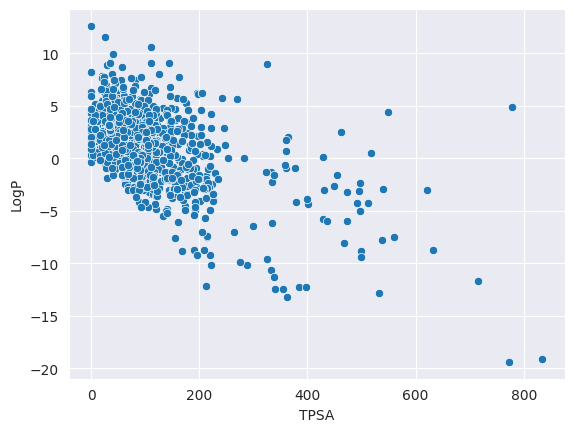

In [ ]:
sns.scatterplot(x='TPSA', y='LogP', data=df)

<Axes: xlabel='MolWt', ylabel='SaturatedRings'>

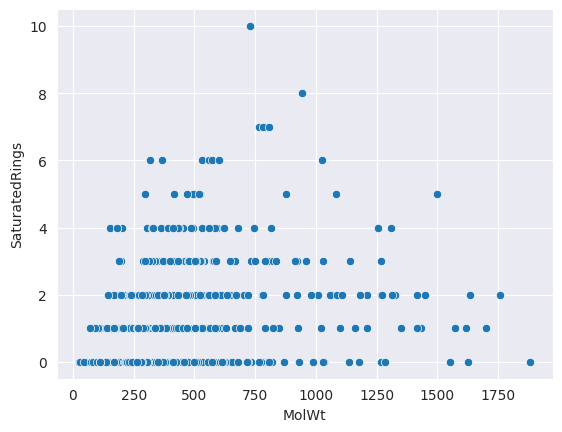

In [ ]:
sns.scatterplot(x='MolWt', y='SaturatedRings', data=df)

<Axes: xlabel='TPSA', ylabel='HeavyAtoms'>

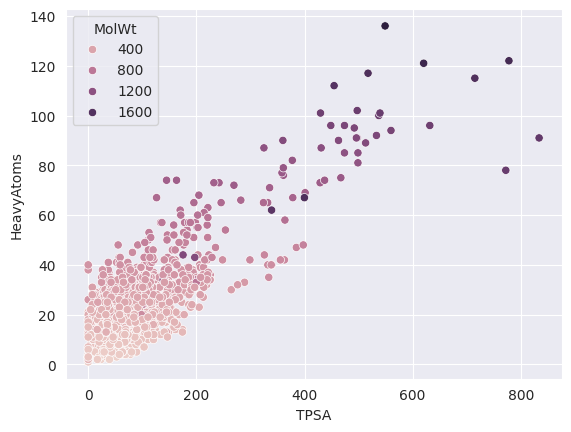

In [ ]:
sns.scatterplot(x='TPSA', y='HeavyAtoms', hue='MolWt', data=df)

<Axes: xlabel='HeavyAtoms', ylabel='MolWt'>

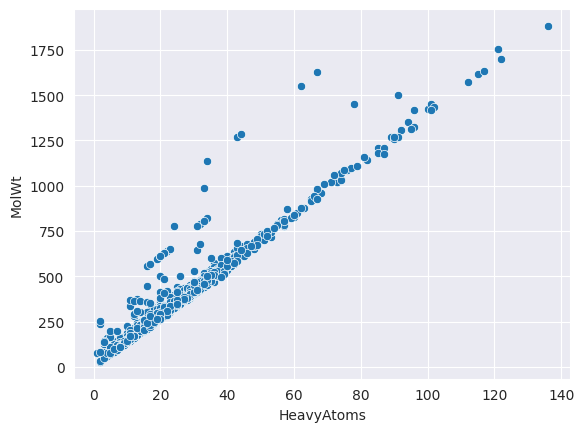

In [ ]:
sns.scatterplot(x='HeavyAtoms', y='MolWt', data=df)

In [ ]:
dfx = df.iloc[:, 3:]
y = df.toxic.values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df.toxic[df.toxic == 1][:3],

(23    1
 26    1
 32    1
 Name: toxic, dtype: int64,)

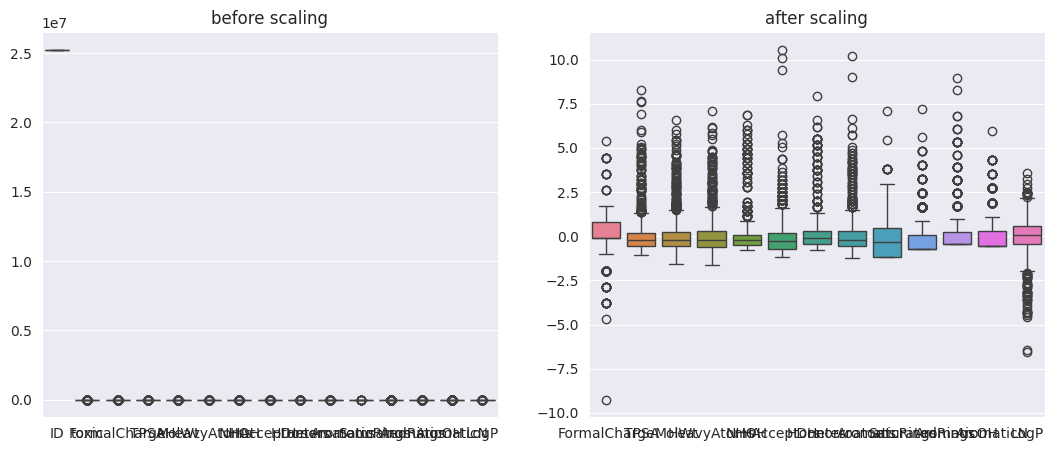

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(dfx), columns=dfx.columns)
plt.figure(figsize=(20, 5), )
plt.subplot(131)
plt.title('before scaling')
ax = sns.boxplot(data=df)
plt.subplot(132)
plt.title('after scaling')
ax = sns.boxplot(data=X_scaled)
plt.show()

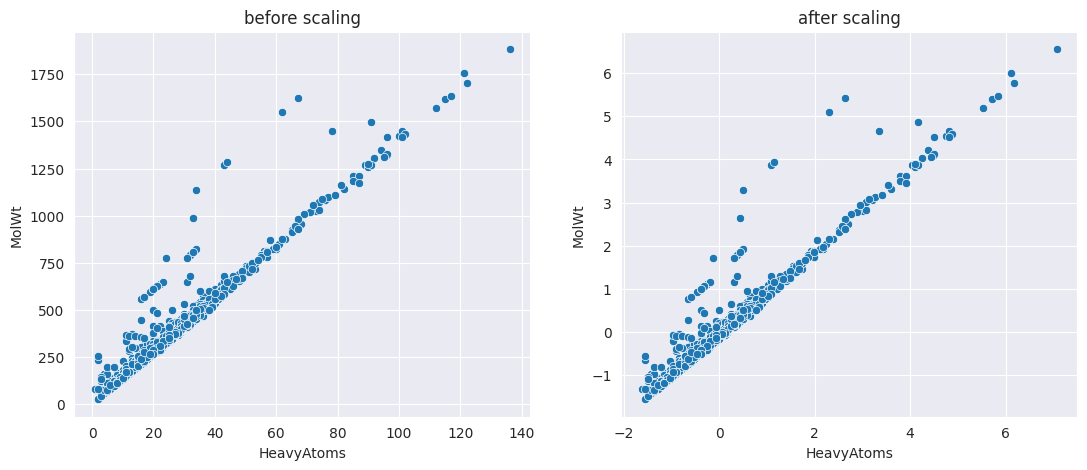

In [ ]:
plt.figure(figsize=(20, 5), )
plt.subplot(131)
plt.title('before scaling')
ax = sns.scatterplot(x='HeavyAtoms', y='MolWt', data=df)
plt.subplot(132)
plt.title('after scaling')
ax = sns.scatterplot(x='HeavyAtoms', y='MolWt', data=X_scaled)
plt.show()

Principal Component Analysis (Linear)

In [ ]:
from sklearn.decomposition import PCA
pca2d = PCA(n_components=2, svd_solver='full')
pca2d.fit(X_scaled)
X_pca2d = pca2d.fit_transform(X_scaled)
X_pca2d, X_pca2d.var

(array([[ 0.42671994,  2.6827303 ],
        [ 1.83663597, -2.76224976],
        [ 0.26557162,  1.82486314],
        ...,
        [-1.32373957,  2.431802  ],
        [ 1.62586322,  1.43625964],
        [-0.63800204, -1.1061232 ]]),
 <function ndarray.var>)

<Axes: >

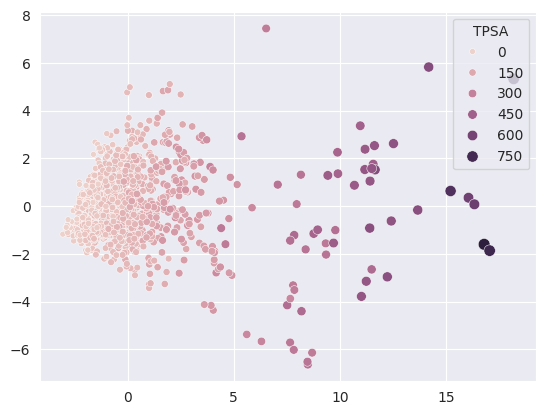

In [ ]:
sns.scatterplot(
    x=X_pca2d[:, 0], y=X_pca2d[:, 1], hue=dfx.TPSA, size=dfx.TPSA)

In [ ]:
pca3d = PCA(n_components=3, svd_solver='full')
pca3d.fit(X_scaled)
X_pca3d = pca2d.fit_transform(X_scaled)
X_pca3d, X_pca3d.var

(array([[ 0.42671994,  2.6827303 ],
        [ 1.83663597, -2.76224976],
        [ 0.26557162,  1.82486314],
        ...,
        [-1.32373957,  2.431802  ],
        [ 1.62586322,  1.43625964],
        [-0.63800204, -1.1061232 ]]),
 <function ndarray.var>)

Single Value Decomposition

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd2d = TruncatedSVD(n_components=2, n_iter=7, algorithm='arpack')
svd2d.fit(X_scaled)
X_svd2d = svd2d.fit_transform(X_scaled)

<Axes: >

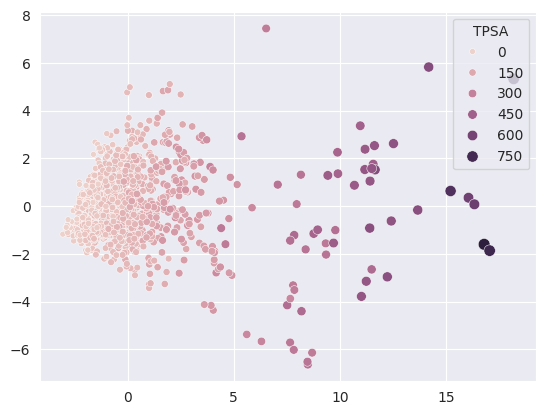

In [ ]:
sns.scatterplot(
    x=X_pca2d[:, 0], y=X_svd2d[:, 1], hue=dfx.TPSA, size=dfx.TPSA)

t-SNE Non-linear

In [ ]:
from sklearn.manifold import TSNE
tsne2d = TSNE(n_components=2, init='pca', random_state=0)
X_tsne2d = tsne2d.fit_transform(X_scaled)
X_scaled.shape, X_tsne2d.shape

((1460, 13), (1460, 2))

<Axes: >

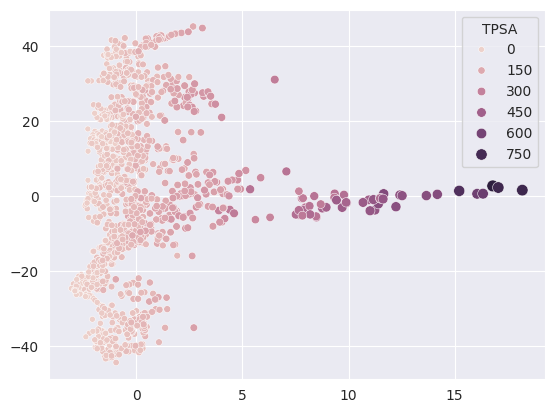

In [ ]:
sns.scatterplot(
    x=X_pca2d[:, 0], y=X_tsne2d[:, 1], hue=dfx.TPSA, size=dfx.TPSA)

Multidimensional Scaling

In [ ]:
from sklearn.manifold import MDS
mds2d = MDS(n_components=2, n_init=3, max_iter=3000)
X_mds2d = mds2d.fit_transform(X_scaled)
X_scaled.shape, X_mds2d.shape

((1460, 13), (1460, 2))

<Axes: >

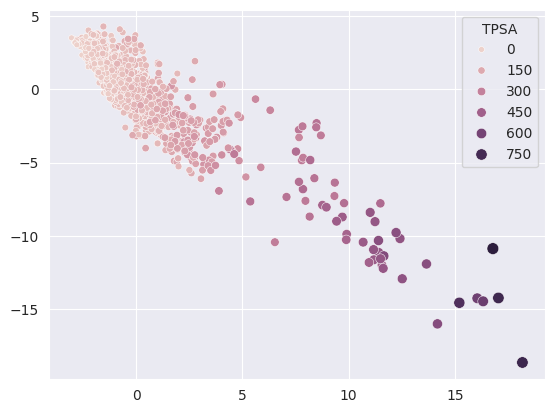

In [ ]:
sns.scatterplot(
    x=X_pca2d[:, 0], y=X_mds2d[:, 1], hue=dfx.TPSA, size=dfx.TPSA)

RNA Sequencing

In [ ]:
df_x = pd.read_csv(
    'nestorowa_corrected_log2_transformed_counts.txt', sep= ' ')
df_x.shape,

((1645, 3991),)

In [ ]:
df_x.head()[:2]

,1110032F04Rik,1110059E24Rik,1300017J02Rik,1600014C10Rik,1700017B05Rik,1700019G17Rik,1700024P16Rik,1700026L06Rik,1700029J07Rik,1700030K09Rik,...,Zscan22,Zscan29,Zswim3,Zswim4,Zswim6,Zufsp,Zxdb,Zxdc,Zyx,Zzz3
HSPC_001,0.0,0.0,0.0,0.000000,1.225439,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.739099,0.0,0.000000,0.0,0.000000,0.0,0.0,5.386021,10.541571
HSPC_002,0.0,0.0,0.0,2.238601,2.238601,0.0,0.0,0.0,9.29824,0.0,...,0.0,2.238601,0.0,2.238601,0.0,2.238601,0.0,0.0,9.164370,3.603855


In [ ]:
df_y = pd.DataFrame()
df_y['annotation'] = df_x.index.str[:4]
df_y['annotation'].value_counts(),

(annotation
 Prog    791
 HSPC    699
 LT.H    155
 Name: count, dtype: int64,)

PCA

<Axes: >

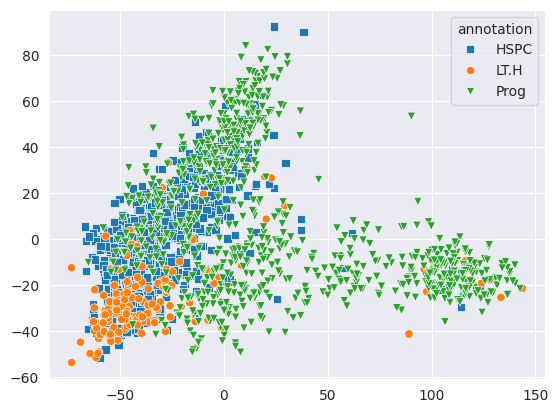

In [ ]:
pca2d = PCA(n_components=2, svd_solver='full')
pca2d.fit(df_x)
X_pcs2d = pca2d.fit_transform(df_x)
sns.scatterplot(x=X_pcs2d[:, 0], y=X_pcs2d[:, 1],
    hue=df_y.annotation, style=df_y.annotation, markers=['s', 'o', 'v'])

SVD

<Axes: >

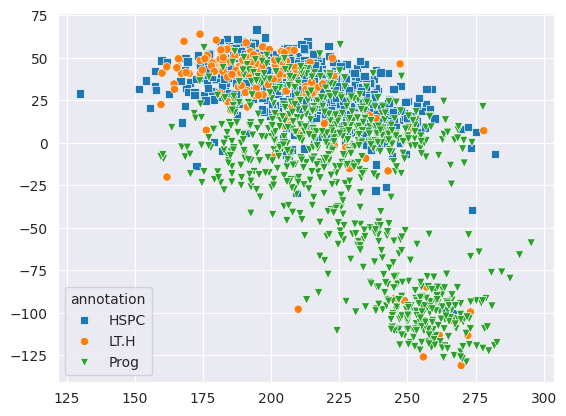

In [ ]:
svd2d = TruncatedSVD(n_components=2, n_iter=7, algorithm='arpack')
svd2d.fit(df_x)
X_svd2d = svd2d.fit_transform(df_x)
sns.scatterplot(x=X_svd2d[:, 0], y=X_svd2d[:, 1],
    hue=df_y.annotation, style=df_y.annotation, markers=['s', 'o', 'v'])

In [ ]:
%%timeit
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
gm_= GaussianMixture(n_components=2, covariance_type='full')
gm_.fit(df_x)
gm_feat_all_pred = 1 - gm_.predict(df_x)

12.2 s ± 536 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
gm_= GaussianMixture(n_components=2, covariance_type='full')
gm_.fit(X_svd2d)
gm_feat_all_pred = 1 - gm_.predict(X_svd2d)

5.51 ms ± 90.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


UMap

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

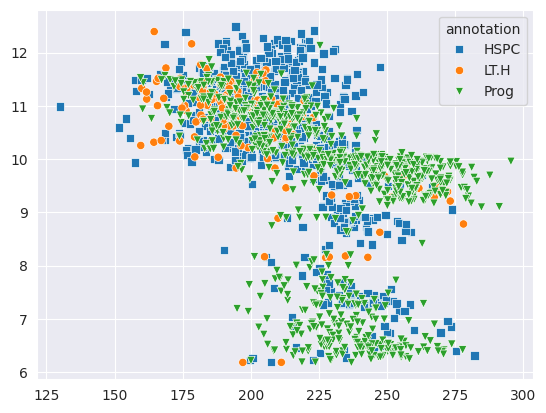

In [ ]:
import umap
data_umap2dn5 = umap.UMAP(
    n_components=2, n_neighbors=5, min_dist=0.0).fit_transform(df_x)
sns.scatterplot(x=X_svd2d[:, 0], y=data_umap2dn5[:, 1],
    hue=df_y.annotation, style=df_y.annotation, markers=['s', 'o', 'v'])

In [ ]:
data_umap2dn5 = umap.UMAP(
    n_components=2, n_neighbors=5, min_dist=0.0).fit_transform(df_x)
data_umap2dn50 = umap.UMAP(
    n_components=2, n_neighbors=10, min_dist=0.0).fit_transform(df_x)
data_umap2dn100 = umap.UMAP(
    n_components=2, n_neighbors=15, min_dist=0.0).fit_transform(df_x)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: title={'center': 'UMAP n_neighbors=100'}>

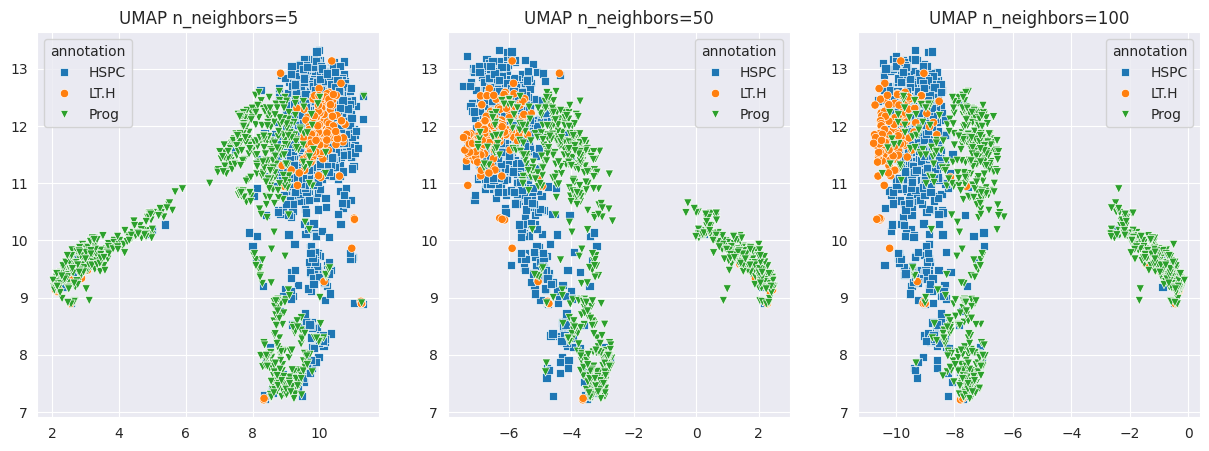

In [ ]:
figure = plt.figure(figsize=(15,5))
figure.add_subplot(131)
plt.title('UMAP n_neighbors=5')
sns.scatterplot(x=data_umap2dn5[:, 0], y=data_umap2dn5[:, 1],
    hue=df_y.annotation, style=df_y.annotation, markers=['s', 'o', 'v'])

figure.add_subplot(132)
plt.title('UMAP n_neighbors=50')
sns.scatterplot(x=data_umap2dn50[:, 0], y=data_umap2dn5[:, 1],
    hue=df_y.annotation, style=df_y.annotation, markers=['s', 'o', 'v'])

figure.add_subplot(133)
plt.title('UMAP n_neighbors=100')
sns.scatterplot(x=data_umap2dn100[:, 0], y=data_umap2dn5[:, 1],
    hue=df_y.annotation, style=df_y.annotation, markers=['s', 'o', 'v'])